In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn import metrics

# Loading the data

In [2]:
boston_df = load_boston()

In [3]:
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(np.c_[boston_df['data'], boston_df['target']],
                  columns= np.append(boston_df['feature_names'], ['target']))

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [6]:
df.shape

(506, 14)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [10]:
df.CHAS.unique()

array([0., 1.])

In [11]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Performing EDA

In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<IPython.core.display.Javascript object>

<AxesSubplot:>

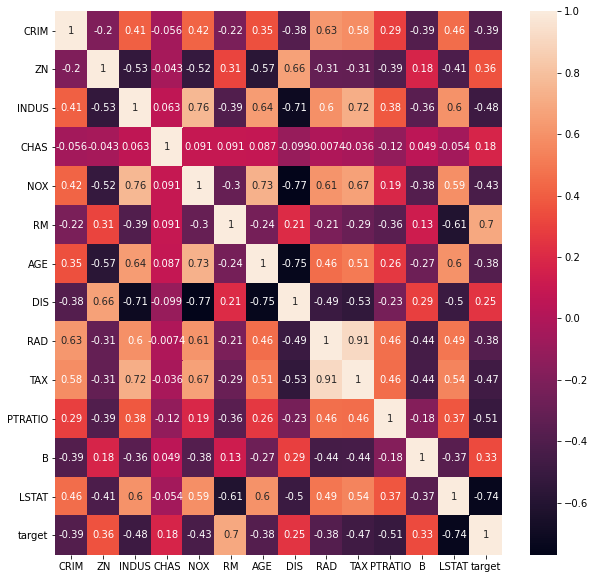

In [13]:
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df.corr(), annot = True,fmt = '.2g')

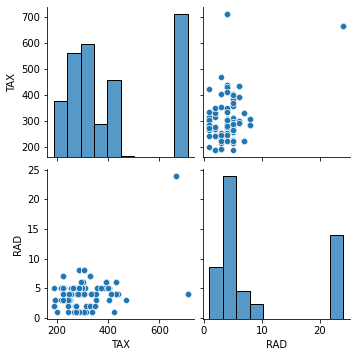

In [14]:
sns.pairplot(df, vars = ['TAX','RAD'])

In [15]:
df.drop(columns = 'RAD', inplace=True)

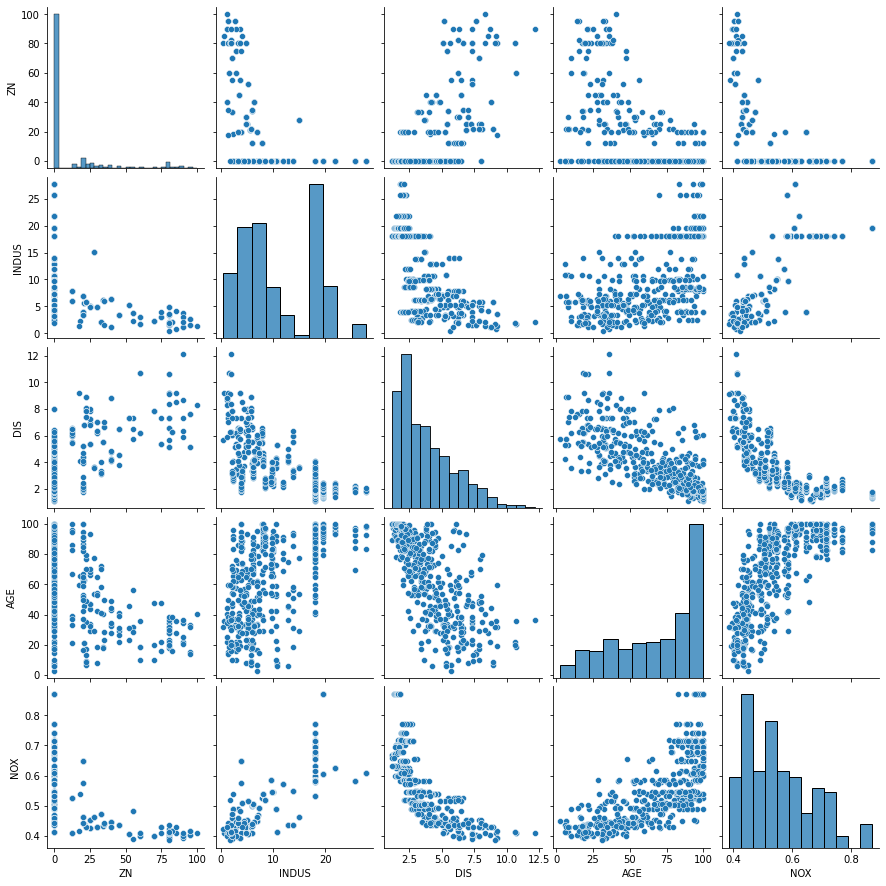

In [16]:
sns.pairplot(df, vars = ['ZN','INDUS','DIS','AGE','NOX'])

# Outlier Checking

<AxesSubplot:xlabel='CRIM'>

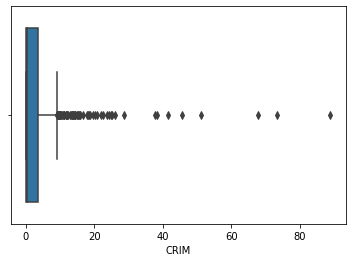

In [17]:
sns.boxplot(x = 'CRIM' , data=df)

In [18]:
df.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [19]:
Q1,Q3 = np.quantile(df.CRIM,[0.25,0.75])
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

<AxesSubplot:xlabel='CRIM'>

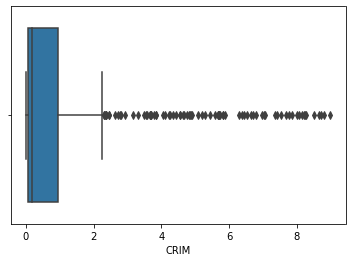

In [20]:
df.drop(df[(df['CRIM']< lower)].index,axis=0,inplace=True)
df.drop(df[(df['CRIM']> upper)].index,axis=0,inplace=True)
sns.boxplot(x = 'CRIM' , data=df)

In [21]:
df.CRIM.describe()

count    440.000000
mean       1.198341
std        2.128147
min        0.006320
25%        0.068962
50%        0.176440
75%        0.960870
max        8.982960
Name: CRIM, dtype: float64

<AxesSubplot:xlabel='ZN'>

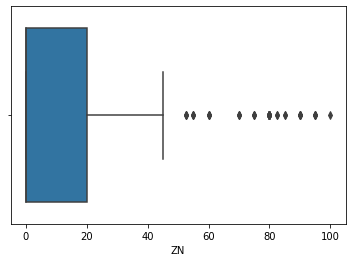

In [22]:
sns.boxplot(x = 'ZN' , data=df)

In [23]:
df.ZN.describe()

count    440.000000
mean      13.068182
std       24.563940
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      100.000000
Name: ZN, dtype: float64

In [24]:
Q1, Q3 = np.quantile(df.ZN, [0.25,0.75])
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

<AxesSubplot:xlabel='ZN'>

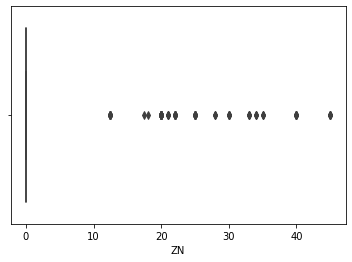

In [25]:
df.drop(df[(df['ZN']< lower)].index,axis=0,inplace=True)
df.drop(df[(df['ZN']> upper)].index,axis=0,inplace=True)
sns.boxplot(x = 'ZN' , data=df)

In [26]:
df.ZN.describe()

count    395.000000
mean       5.791139
std       11.576332
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       45.000000
Name: ZN, dtype: float64

<AxesSubplot:xlabel='INDUS'>

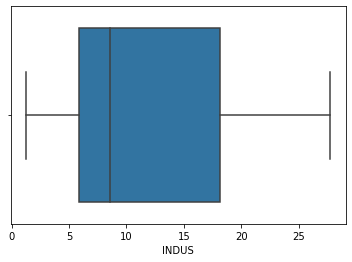

In [27]:
sns.boxplot(x = 'INDUS' , data=df)

<AxesSubplot:xlabel='CHAS'>

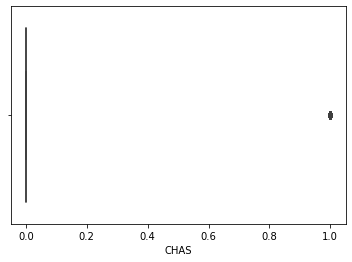

In [28]:
sns.boxplot(x = 'CHAS' , data=df)

In [29]:
df.CHAS.describe()

count    395.000000
mean       0.086076
std        0.280832
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

In [30]:
df.CHAS.value_counts()

0.0    361
1.0     34
Name: CHAS, dtype: int64

<AxesSubplot:xlabel='NOX'>

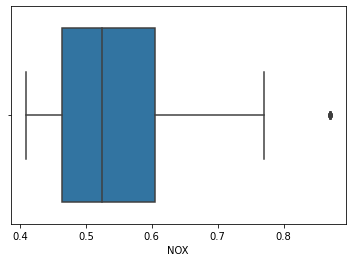

In [31]:
sns.boxplot(x = 'NOX' , data=df)

<AxesSubplot:xlabel='RM'>

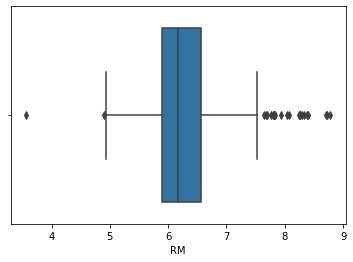

In [32]:
sns.boxplot(x = 'RM' , data=df)

In [33]:
df.RM.describe()

count    395.000000
mean       6.301365
std        0.666771
min        3.561000
25%        5.901500
50%        6.169000
75%        6.565000
max        8.780000
Name: RM, dtype: float64

In [34]:
Q1, Q3 = np.quantile(df.RM, [0.25,0.75])
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

<AxesSubplot:xlabel='RM'>

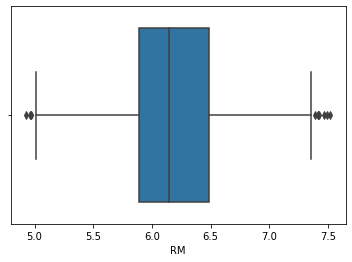

In [35]:
df.drop(df[df['RM'] < lower].index,axis=0,inplace=True)
df.drop(df[df['RM'] > upper].index,axis=0,inplace=True)
sns.boxplot(x = 'RM' , data=df)

In [36]:
df.RM.describe()

count    372.000000
mean       6.209917
std        0.494452
min        4.926000
25%        5.888750
50%        6.148000
75%        6.484750
max        7.520000
Name: RM, dtype: float64

<AxesSubplot:xlabel='AGE'>

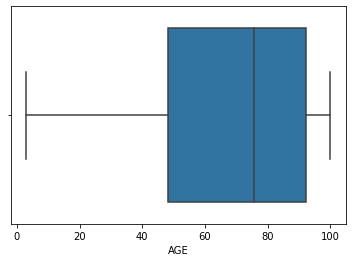

In [37]:
sns.boxplot(x = 'AGE' , data=df)

<AxesSubplot:xlabel='DIS'>

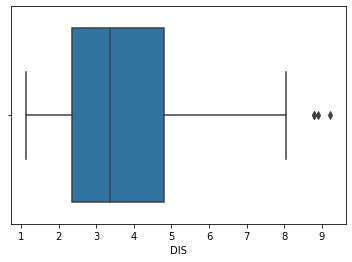

In [38]:
sns.boxplot(x = 'DIS' , data=df)

<AxesSubplot:xlabel='TAX'>

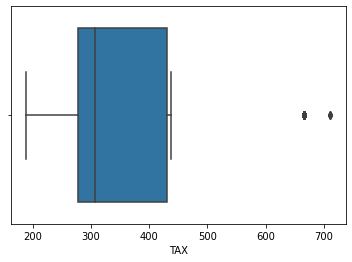

In [39]:
sns.boxplot(x = 'TAX' , data=df)

In [40]:
df.TAX.describe()

count    372.000000
mean     379.879032
std      151.551950
min      188.000000
25%      277.000000
50%      307.000000
75%      430.500000
max      711.000000
Name: TAX, dtype: float64

In [41]:
Q1,Q3 = np.quantile(df.TAX, [0.25,0.75])
IQR = Q3-Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

In [42]:
df.drop(df[df['TAX'] < lower].index, axis=0, inplace=True)
df.drop(df[df['TAX'] > upper].index, axis=0, inplace=True)

<AxesSubplot:xlabel='TAX'>

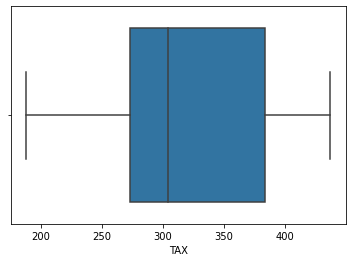

In [43]:
sns.boxplot(x = 'TAX' , data=df)

In [44]:
df.TAX.describe()

count    303.000000
mean     313.980198
std       68.516008
min      188.000000
25%      273.000000
50%      304.000000
75%      384.000000
max      437.000000
Name: TAX, dtype: float64

<AxesSubplot:xlabel='PTRATIO'>

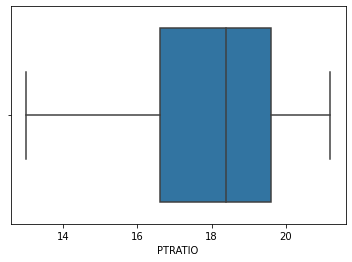

In [45]:
sns.boxplot(x = 'PTRATIO' , data=df)


<AxesSubplot:xlabel='B'>

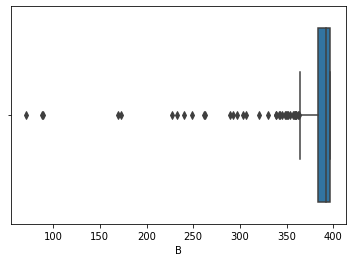

In [46]:
sns.boxplot(x = 'B' , data=df)


In [47]:
df.B.describe()

count    303.000000
mean     379.472904
std       43.230386
min       70.800000
25%      383.490000
50%      392.830000
75%      396.660000
max      396.900000
Name: B, dtype: float64

In [48]:
Q1,Q3 = np.quantile(df.B, [0.25,0.75])
IQR = Q3-Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

<AxesSubplot:xlabel='B'>

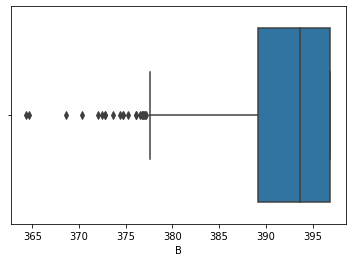

In [49]:
df.drop(df[df['B']<lower].index,axis=0,inplace=True)
df.drop(df[df['B']>upper].index,axis=0,inplace=True)
sns.boxplot(x = 'B' , data=df)

In [50]:
df.B.describe()

count    267.000000
mean     391.154981
std        7.128752
min      364.310000
25%      389.140000
50%      393.680000
75%      396.900000
max      396.900000
Name: B, dtype: float64

<AxesSubplot:xlabel='LSTAT'>

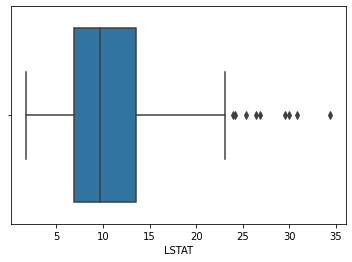

In [51]:
sns.boxplot(x = 'LSTAT' , data=df)

In [52]:
df.LSTAT.describe()

count    267.000000
mean      10.888090
std        5.354223
min        1.730000
25%        6.885000
50%        9.710000
75%       13.550000
max       34.410000
Name: LSTAT, dtype: float64

In [53]:
Q1,Q3 = np.quantile(df.LSTAT, [0.25,0.75])
IQR = Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)

<AxesSubplot:xlabel='LSTAT'>

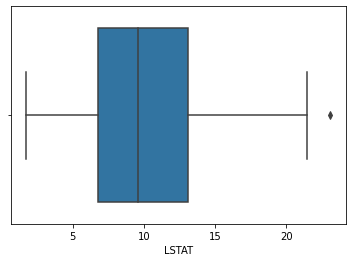

In [54]:
df.drop(df[df['LSTAT']<lower].index,axis=0,inplace=True)
df.drop(df[df['LSTAT']>upper].index,axis=0,inplace=True)
sns.boxplot(x = 'LSTAT' , data=df)

In [55]:
df.LSTAT.describe()

count    258.000000
mean      10.293217
std        4.330931
min        1.730000
25%        6.800000
50%        9.630000
75%       13.077500
max       23.090000
Name: LSTAT, dtype: float64

In [56]:
target_feature=df.target

In [58]:

df.drop(columns='target',inplace=True)

In [59]:
X = df
Y = target_feature
print(X.shape)
print(Y.shape)

(258, 12)
(258,)


In [60]:
print(X.head())
print('-'*10)
print(Y[0:10])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296.0     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242.0     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242.0     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222.0     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
----------
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
5     28.7
6     22.9
7     27.1
9     18.9
10    15.0
Name: target, dtype: float64


# Splitting the data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(206, 12)
(206,)
(52, 12)
(52,)


# Building the model

In [62]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [63]:
mlr.coef_

array([ 1.69375352e+00,  2.14421562e-02, -4.33867595e-02,  8.21601288e-01,
       -1.20203011e+01,  6.99512125e+00, -4.72102733e-02, -1.11310080e+00,
       -1.06332132e-02, -7.66523724e-01, -1.06011979e-02, -1.12814621e-01])

In [64]:
mlr.intercept_

15.586358525953305

In [65]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(mlr.coef_))], axis = 1)
coefficients

,0,0
0,CRIM,1.693754
1,ZN,0.021442
2,INDUS,-0.043387
3,CHAS,0.821601
4,NOX,-12.020301
5,RM,6.995121
6,AGE,-0.047210
7,DIS,-1.113101
8,TAX,-0.010633
9,PTRATIO,-0.766524


# Predicting the test data

In [66]:
y_pred = mlr.predict(X_test)

In [67]:
y_pred[:10]

array([20.78283802, 18.26384015, 22.3112758 , 25.18097484, 23.63752241,
       21.08022882, 25.92034499, 23.65172892, 26.54970915, 22.93719918])

# Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

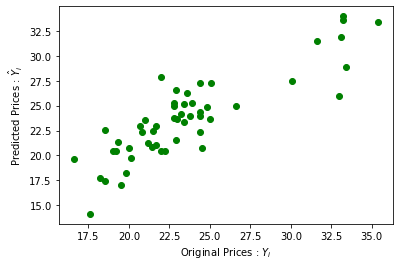

In [68]:
plt.scatter(y_test, y_pred, color = 'g')
plt.xlabel("Original Prices : $Y_i$")
plt.ylabel("Predicted Prices : $\hat{Y}_i$")

plt.show()

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

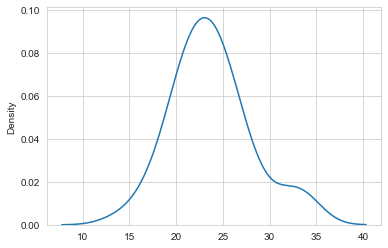

In [69]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

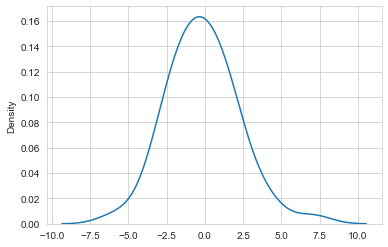

In [70]:
delta_y = y_test - y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

# Evaluation Metrics

In [71]:
print('R^2 value - {}'.format(metrics.r2_score(y_test, y_pred)))

R^2 value - 0.7425197857493067


In [72]:
print('MSE value - {}'.format(metrics.mean_squared_error(y_test, y_pred)))

MSE value - 5.249016024539651


In [73]:
print('MAE value - {}'.format(metrics.mean_absolute_error(y_test, y_pred)))

MAE value - 1.7710360158491996


In [74]:
print('Root Mean Squared value - {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared value - 2.291073116367012
